In [28]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,normalize
%matplotlib inline
import cufflinks as cf
cf.go_offline()
from scipy import stats
from sklearn.linear_model import LinearRegression

In [29]:
df = pd.read_csv("/content/drive/MyDrive/healthcare-dataset-stroke-data.csv")

In [30]:
df.shape


(5110, 12)

In [31]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [32]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [34]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [35]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [36]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [ ]:
df['heart_disease'].value_counts()

In [ ]:
df['ever_married'].value_counts()

In [ ]:
df['smoking_status'].value_counts

In [14]:
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [15]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [16]:
#tabular representation of data
pd.crosstab(df.stroke,df.smoking_status)

smoking_status,Unknown,formerly smoked,never smoked,smokes
stroke,,,,
0,1497,815,1802,747
1,47,70,90,42


In [18]:
#to find out  which row has gender has other
df[df['gender']=='Other']

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [25]:
df.drop(df[df['id']==56156].index,inplace=True)

In [26]:
df['gender'].value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

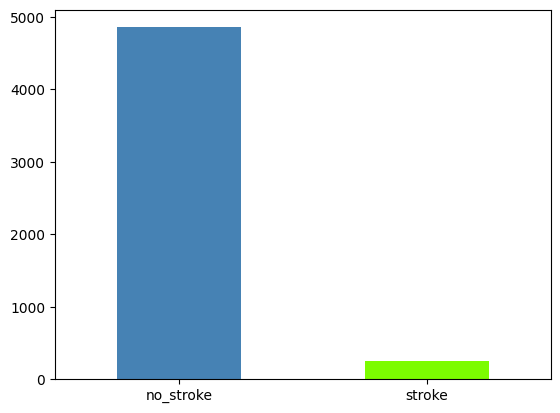

In [28]:
# Let's put this in a plot
st_plot = df["stroke"].value_counts().plot(kind="bar",color=["steelblue","lawngreen"], rot=0)
plt.xticks(ticks=[1,0], labels=["stroke", "no_stroke"]);

In [29]:
#it check every row and if it is duplicated it print true otherwise falase
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5105    False
5106    False
5107    False
5108    False
5109    False
Length: 5109, dtype: bool

In [30]:
#it checks overall and if there is any one value dupliacted it prints true itherwise false
df.duplicated().any()

False

In [31]:
#used to check Nan or None values in the dataset
df.isnull().values

array([[False, False, False, ..., False, False, False],
       [False, False, False, ...,  True, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [32]:
#if there are any null values it shows true otherwose false
df.isnull()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,False,False,False,False,False,False,False,False,False,True,False,False
5106,False,False,False,False,False,False,False,False,False,False,False,False
5107,False,False,False,False,False,False,False,False,False,False,False,False
5108,False,False,False,False,False,False,False,False,False,False,False,False


In [33]:
#it checks overall and if there are any null values it shows true
df.isnull().values.any()

True

In [34]:
#checking hpw many attributes containning missing values
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [35]:
#filling the missing values of bmi with the median of bmi
df["bmi"]=df['bmi'].fillna(df.median().iloc[0])

In [36]:
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

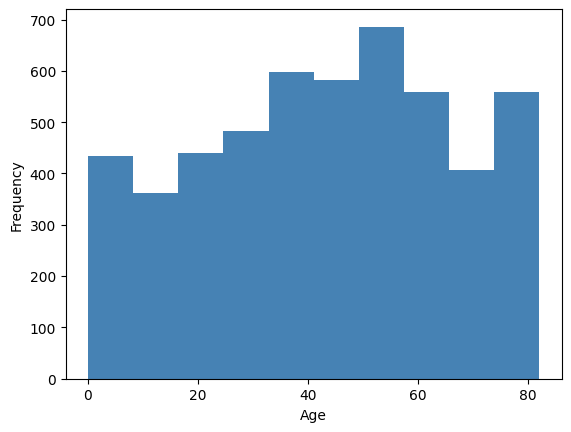

In [37]:
# Let's look at this distribution by ages along the x-axis
df["age"].plot.hist(color="steelblue")
plt.xlabel("Age");

In [40]:
#droppind id column or feature from the dataset
#if inplace=true it creates new dataframe
new_df=df.drop(["id"], axis=1, inplace=False)

In [42]:
#here directly original data is not modified instead it created new data frame and changes are made in that new data frame whereas original dataframe remians same
#here id column is dropped
new_df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [43]:
#here id column is not dropped
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

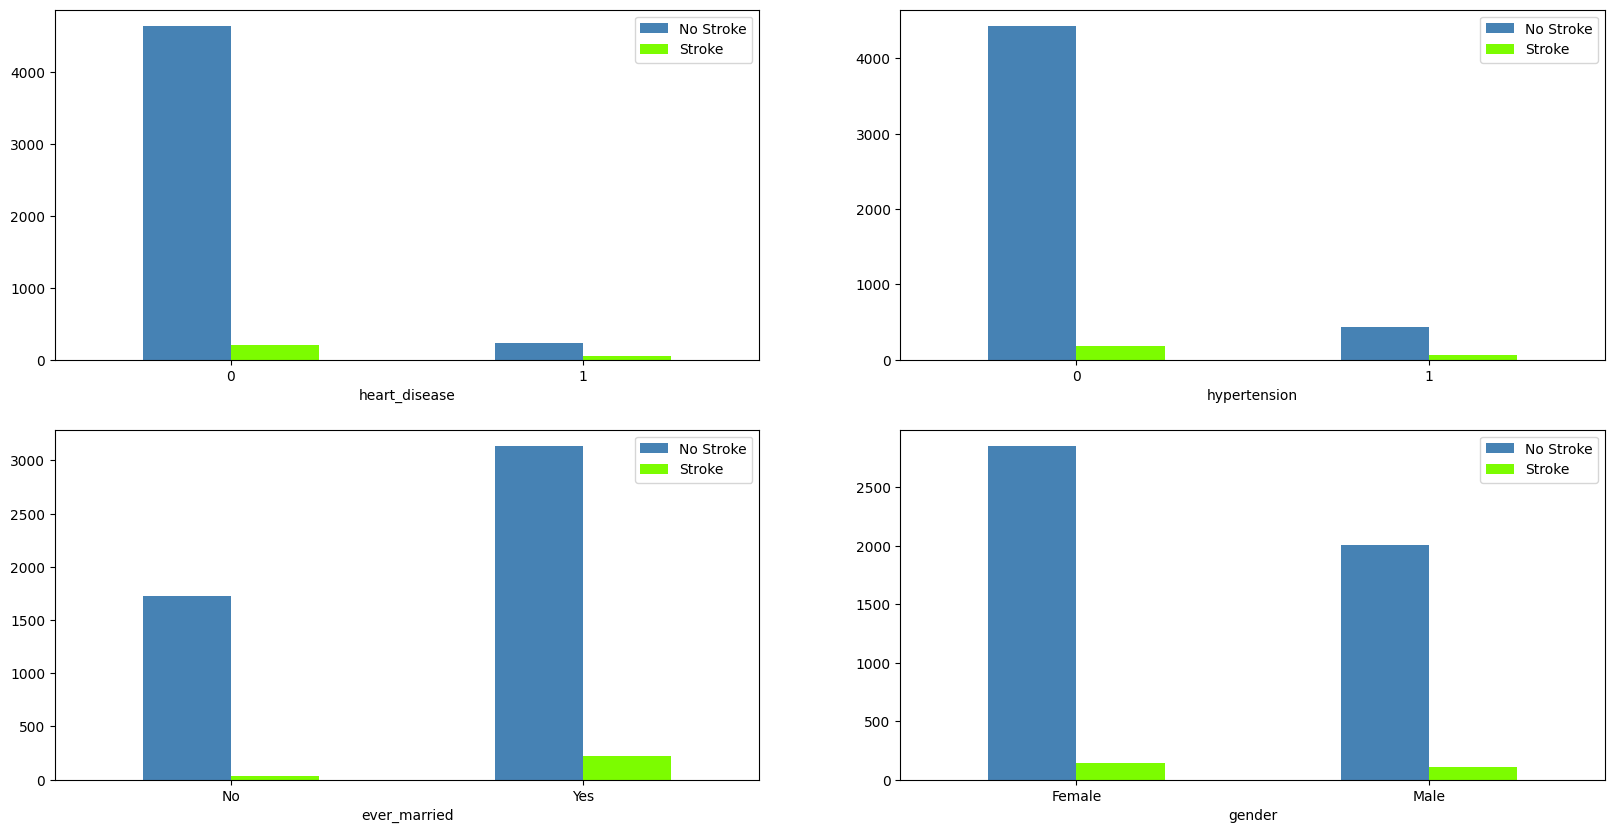

In [46]:
# Creating some crosstab info for some of the remaining columns
ct1 = pd.crosstab(df.heart_disease,df.stroke)
ct2 = pd.crosstab(df.hypertension,df.stroke)
ct3 = pd.crosstab(df.ever_married,df.stroke)
#ct4 = pd.crosstab(df.smoking_status,df.stroke)
ct4 = pd.crosstab(df.gender,df.stroke)

# Setting the colors
colors = ["steelblue","lawngreen"]

# Setting up the figure and different axes on the figure
#figsize(width,height)
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,
                                          ncols=2,
                                          figsize=(20,10))

# Plotting each crosstab on a different axis
ct1.plot(kind='bar',ax=ax1,color=colors,rot=0)
ct2.plot(kind='bar',ax=ax2,color=colors,rot=0)
ct3.plot(kind='bar',ax=ax3,color=colors,rot=0)
ct4.plot(kind='bar',ax=ax4,color=colors,rot=0);

# Setting x labels for heart_disease and hypertension
#if no or yes is lablled then it will show its values either 0 or 1 or smoked ,never smoked etc...
ax1.set_xticklabels(["No","Yes"])
ax2.set_xticklabels(["No","Yes"])

# Changing the lables of the legend
ax1.legend(labels=['No Stroke', 'Stroke'])
ax2.legend(labels=['No Stroke', 'Stroke'])
ax3.legend(labels=['No Stroke', 'Stroke'])
ax4.legend(labels=['No Stroke', 'Stroke'])

In [51]:
#making correlation matrix
#1 means positive that is both the columns are directly proportional whereas
#-1 is negative that is both columns are indirectly related to each other
#0 means no linear correlation between them
df.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003677,0.003610,-0.001253,0.000943,-0.127605,0.006430
age,0.003677,1.000000,0.276367,0.263777,0.238323,0.079280,0.245239
hypertension,0.003610,0.276367,1.000000,0.108292,0.174540,0.093206,0.127891
heart_disease,-0.001253,0.263777,0.108292,1.000000,0.161907,0.098654,0.134905
avg_glucose_level,0.000943,0.238323,0.174540,0.161907,1.000000,0.092177,0.131991
bmi,-0.127605,0.079280,0.093206,0.098654,0.092177,1.000000,0.141272
stroke,0.006430,0.245239,0.127891,0.134905,0.131991,0.141272,1.000000


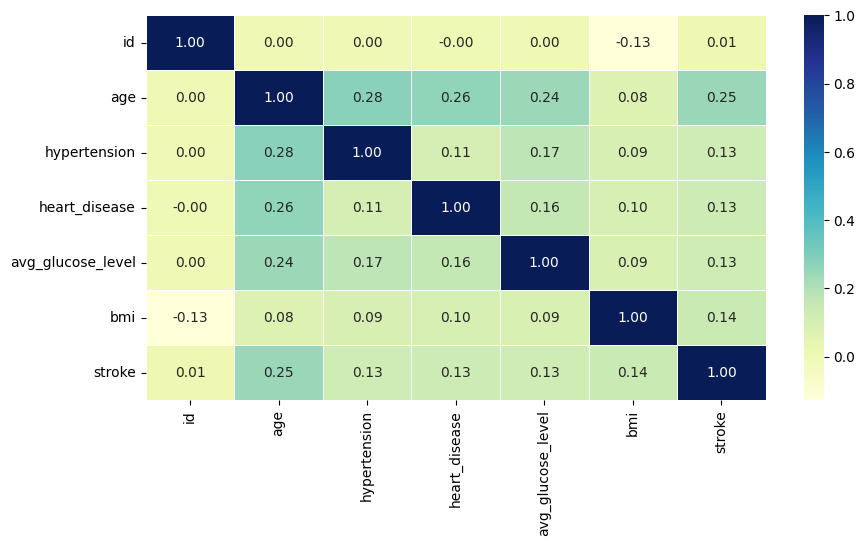

In [53]:
# Let's make the correlation matrix into a heatmap
#heatmap is used to assigncolour to each value in the matrix based on their magnitude
#min values with one colour and max values with another colour of higher intensity
#correlation heatmap is used to assign positive correlation one colour and negative another colour
#positive with brighter colour
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu"
                );

In [54]:
# splitting your dataset into feature variables (X) and the target variable (y)
#X = df.drop("stroke", axis=1): This line creates a new DataFrame X by dropping the "stroke" column from the original DataFrame df
#y = df["stroke"]: This line creates a Series y that contains the values of the "stroke" column from the original DataFrame df
#y is used to represent target variable which you want to predict or classify
#The shapes of X and y will provide you with information about the dimensions of your data, which is essential for training machine learning models.
X = df.drop("stroke", axis=1)
y = df["stroke"]

# Checking the shapes
X.shape, y.shape
#x contains all attributes except stroke

((5109, 11), (5109,))

In [55]:
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [12]:
pip install --upgrade scikit-learn

In [21]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns

# Scikit-Learn estimators
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression # Regression might seem counterintuitive, but we'll address this later
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC

# Model Evaluations
#from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score # Separate lines to keep everyting "Pythonic"
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [22]:
df = pd.read_csv("/content/drive/MyDrive/healthcare-dataset-stroke-data.csv")

In [23]:
# Creating a random seed to mix the data
np.random.seed(88)
X = df.drop("stroke", axis=1)
y = df["stroke"]
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Splitting the training data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25)

# Making sure our data was split correctly
len(df), len(X_train), len(X_valid), len(X_test)

(5110, 3066, 1022, 1022)

In [ ]:
#So in the above cell, we first split our entire data set into 80% for training and 20% for testing. We then split that 80% for training into 75% for training and 25% for validation. So finally we should have 60% for training, 20% for validation, and 20% for testing. So:
#3065/5109 = 59.99% Training
#1022/5109 = 20.00% Validation
#1022/5109 = 20.00% Test

In [24]:
# Creating a list of our split X values
data_splits = [X_train,X_valid,X_test]

# Function to fill in null values with the median of BMI data
def median_filler(split):
    """
    Fills in any missing bmi values with the median from the set.
    """
    split["bmi"].fillna(split["bmi"].median(),inplace=True)

# Function to convert non-numeric values into numeric ones
def convert_category(split):
    """
    Converts non-numeric values into categories.
    The categories are then converted to integers via the category code.
    """
    for label, content in split.items():
        if pd.api.types.is_object_dtype(content):
            # First creating categories
            split[label] = content.astype("category").cat.as_ordered()

            # Next accessing the corresponding codes for each category
            split[label] = pd.Categorical(content).codes

# Looping each X split in our list through the two functions
for split in data_splits:
    median_filler(split)
    convert_category(split)

    # Checking null values
    print(f"Number of nulls: {split['bmi'].isnull().sum()}")

    # Checking datatypes
    print(f"Datatypes:\n{split.dtypes}")
    print("__________________________________")

Number of nulls: 0
Datatypes:
id                     int64
gender                  int8
age                  float64
hypertension           int64
heart_disease          int64
ever_married            int8
work_type               int8
Residence_type          int8
avg_glucose_level    float64
bmi                  float64
smoking_status          int8
dtype: object
__________________________________
Number of nulls: 0
Datatypes:
id                     int64
gender                  int8
age                  float64
hypertension           int64
heart_disease          int64
ever_married            int8
work_type               int8
Residence_type          int8
avg_glucose_level    float64
bmi                  float64
smoking_status          int8
dtype: object
__________________________________
Number of nulls: 0
Datatypes:
id                     int64
gender                  int8
age                  float64
hypertension           int64
heart_disease          int64
ever_married            int8


In [25]:
# Generating a list of the original non-numeric objects
objects = ["gender", "ever_married", "work_type", "Residence_type", "smoking_status"]

# Empty lists for counted values
original_count = []
split_count =[]

# Counting the original objects, and the combined split object's values
for object in objects:
    original_count.append(df[object].value_counts())

    # Add each split value together
    split_add = 0

    for split in data_splits:
        split_add += split[object].value_counts()
    split_count.append(split_add)

# Checking to make sure that they are equal to each other
for i, obj in enumerate(objects):
    if original_count[i].values.tolist() == split_count[i].values.tolist():
        print(f"All {obj} values were mapped correctly!")
    else:
        print(f"There was a problem with {obj}.")

There was a problem with gender.
All ever_married values were mapped correctly!
All work_type values were mapped correctly!
All Residence_type values were mapped correctly!
All smoking_status values were mapped correctly!


In [26]:
# Put our models in a dictionary
models = {"Linear SVC": LinearSVC(),
          "KNeighbors": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier(),
          "Logistic Regression": LogisticRegression()}

# Create a funciton that will fit and score the models (based on training and validation sets)
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models: a dictionary of different Scikit-Learn machine learning models
    X_train: training features
    X_valid: validation/test features
    y_train: training labels
    y_valid: validation/test labels
    """
    # Setting a random seed
    np.random.seed(88)

    # Empty dictionary to store model scores
    model_scores = {}

    # Looping through each model
    for name, model in models.items():

        # Fit the model
        model.fit(X_train, y_train)

        # Evaluate the model and append it's accuracy score to model_scores
        model_scores[name] = model.score(X_test, y_test)

    # Return the model_scores dictionary
    return model_scores

In [27]:
# Blocking warnings
warnings.filterwarnings("ignore")

# Running the above function and returning our score dictionary
model_scores = fit_and_score(models,X_train,X_valid,y_train,y_valid)

model_scores

{'Linear SVC': 0.9305283757338552,
 'KNeighbors': 0.9305283757338552,
 'Random Forest': 0.9305283757338552,
 'Logistic Regression': 0.9295499021526419}

In [47]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [49]:
y_pred = classifier.predict(X_test)

In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       987
           1       0.00      0.00      0.00        35

    accuracy                           0.97      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.93      0.97      0.95      1022



96.57534246575342

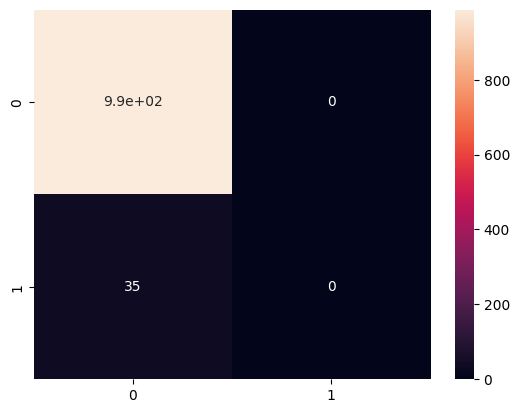

In [51]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)
plt.savefig('confusion.png')
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)*100
ac # Print Accuracy